### Q1. What is an activation function in the context of artificial neural networks?

In the context of artificial neural networks, an activation function is a mathematical operation applied to each node (or neuron) in a neural network. The purpose of an activation function is to introduce non-linearity into the network, allowing it to learn complex patterns in the data.

Neurons in a neural network receive input signals, perform a weighted sum of these inputs, and then apply an activation function to produce the output. The activation function determines whether a neuron should be activated (fired) or not, based on the weighted sum of its inputs.

A neural network without an activation function is essentially just a linear regression model. The activation function does the non-linear transformation to the input making it capable to learn and perform more complex tasks.

The choice of activation function depends on the specific task and the characteristics of the data being processed.

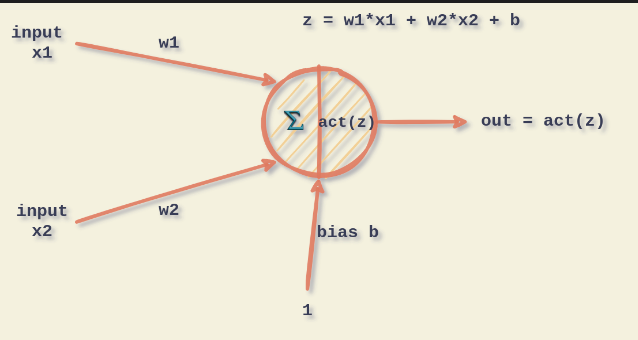

### Q2. What are some common types of activation functions used in neural networks?

There are several common types of activation functions used in neural networks. Here are some of them:

##### Sigmoid Activation Function (Logistic):
    
* It squashes the input values between 0 and 1.
* Often used in the output layer of binary classification models because it can represent probabilities.

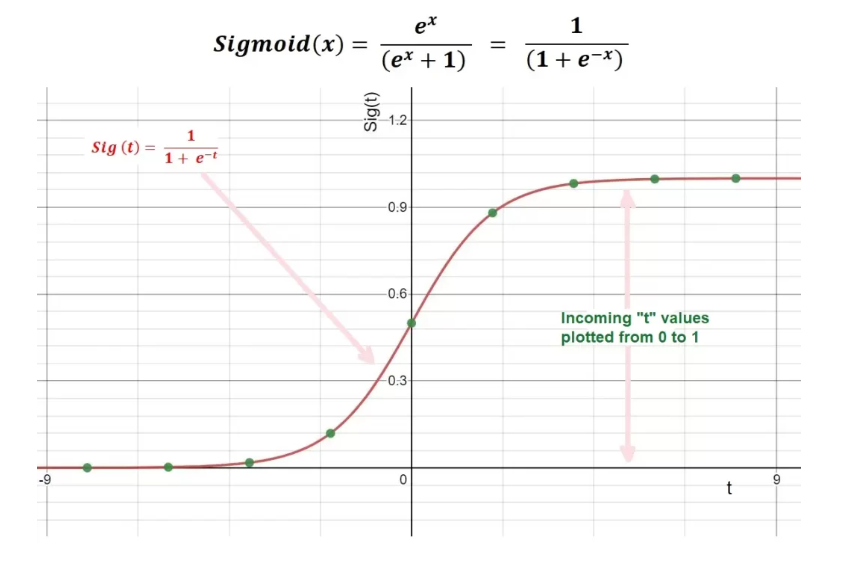

##### Hyperbolic Tangent Function (tanh):

* Similar to the sigmoid function but squashes the input values between -1 and 1.
* Commonly used in the hidden layers of neural networks.

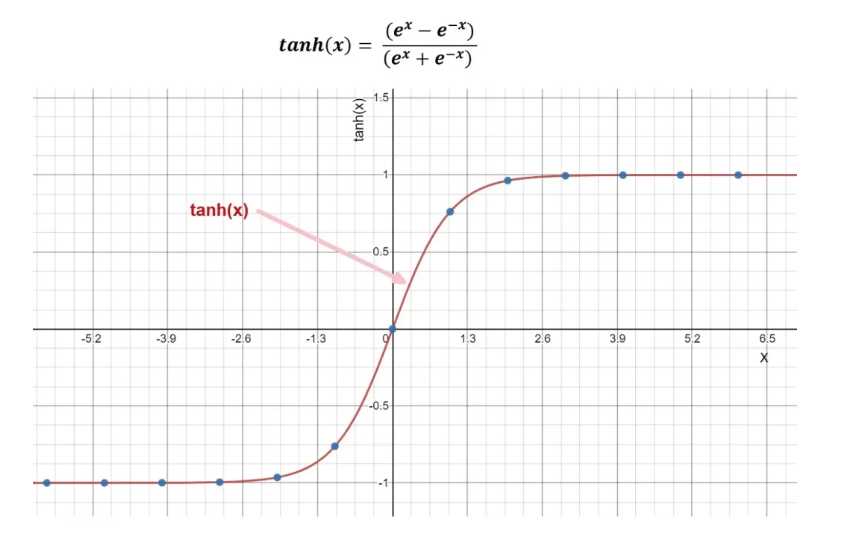

##### Rectified Linear Unit (ReLU):

* Sets negative values to zero and passes positive values unchanged.
* Widely used in hidden layers due to its simplicity and efficiency.

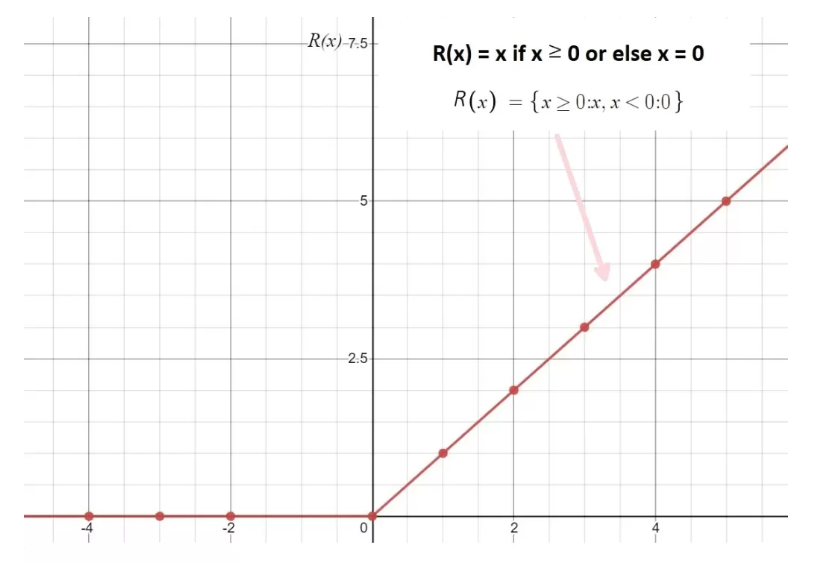

##### Leaky Rectified Linear Unit (Leaky ReLU):

* Similar to ReLU but allows a small, positive gradient for negative inputs (α is a small positive constant).
* Addresses the "dying ReLU" problem where neurons can become inactive during training.

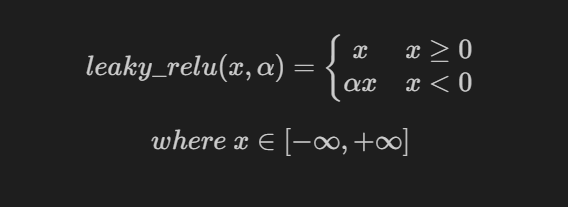

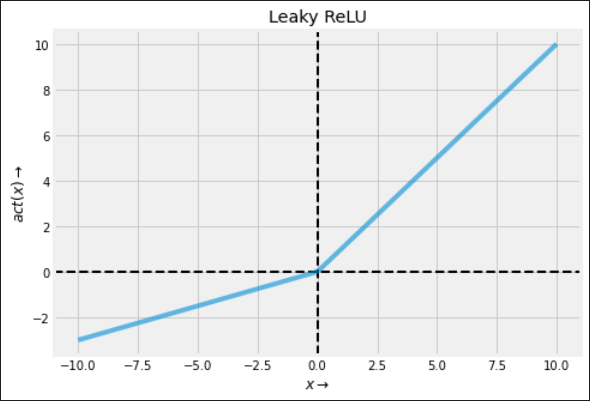

##### Parametric Rectified Linear Unit (PReLU):

* Similar to Leaky ReLU but allows the slope (α) to be learned during training rather than being a fixed hyperparameter.

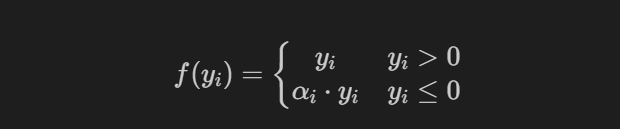

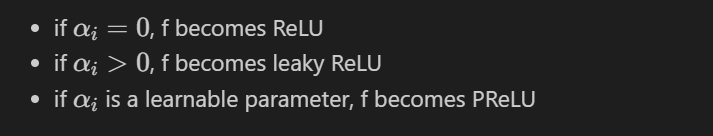

##### Exponential Linear Unit (ELU):

* Similar to ReLU for positive inputs but allows negative values with a smooth transition.
* Introduces a non-zero slope for negative inputs to prevent dead neurons.

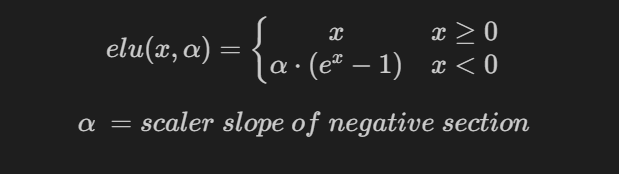

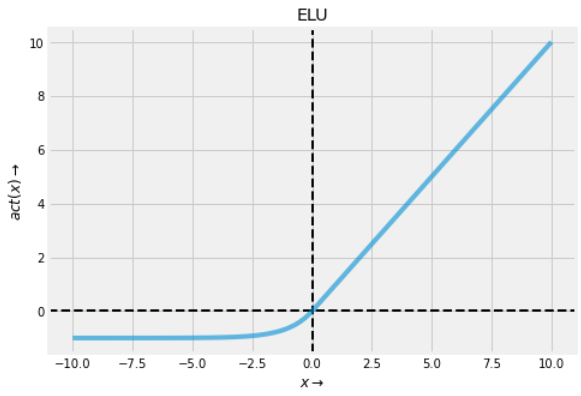

##### Softmax Activation Function:

* Used in the output layer of a neural network for multi-class classification.
* Converts the network's raw output into probability distributions over multiple classes.

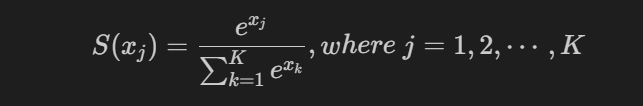

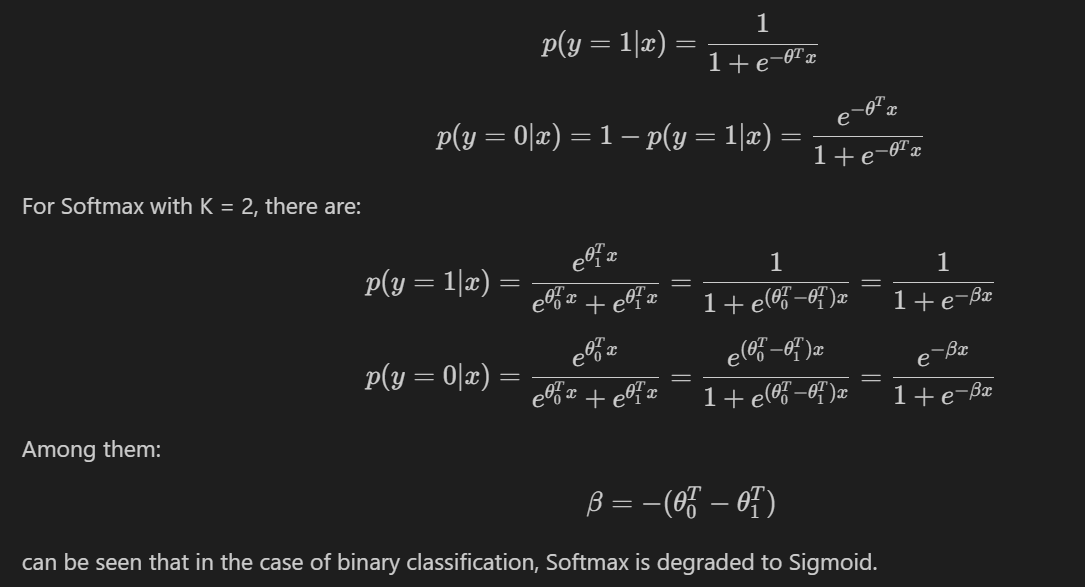

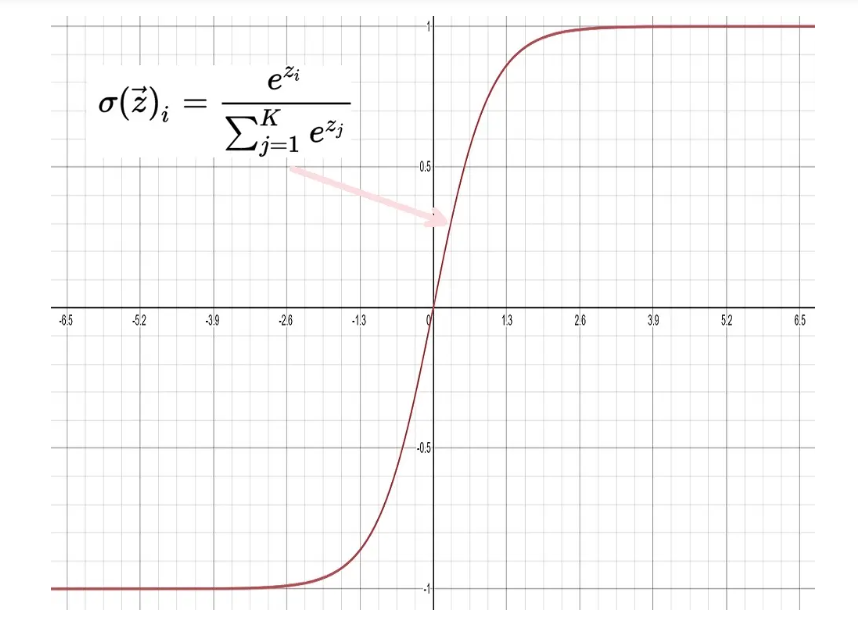

### Q3. How do activation functions affect the training process and performance of a neural network?

Activation functions play a crucial role in the training process and performance of a neural network. Here are some ways in which activation functions can impact the network :

* ##### Non-Linearity:
Activation functions introduce non-linearity into the network, enabling it to learn complex mappings between inputs and outputs. Without non-linear activation functions, a neural network would essentially reduce to a linear model, and its expressive power would be limited.

* ##### Gradient Descent and Backpropagation:
  * During the training process, the weights of the neural network are updated using gradient descent and backpropagation. The       choice of activation function affects the gradients that are propagated backward through the network.
  * Activation functions with non-vanishing gradients help in more effective weight updates. Vanishing gradients (very small 
    gradients) can make it difficult for the model to learn, especially in deep networks. This is one reason why activation 
    functions like ReLU gained popularity, as they mitigate the vanishing gradient problem compared to sigmoid and tanh.
    
* ##### Avoiding Saturation:
Saturation refers to situations where the output of an activation function becomes very close to its extremes (0 or 1 for sigmoid and tanh). In these regions, the gradient is very small, and learning can become slow or even halt. ReLU and its variants help alleviate this issue by not saturating for positive inputs.

* ##### Dying Neurons:
In some cases, neurons using certain activation functions may become inactive during training and stop learning altogether, a phenomenon known as "dying neurons." This can happen with ReLU when the output is always negative. Leaky ReLU and other variants were introduced to address this problem.

* ##### Efficiency and Training Speed:
Some activation functions, like ReLU, are computationally efficient compared to others, making training faster. However, the efficiency should be balanced with the potential for issues like dying neurons.

* ##### Task-Specific Performance:
The choice of activation function can depend on the nature of the task. For instance, sigmoid and softmax are commonly used in the output layer for binary and multi-class classification, respectively. ReLU is often used in hidden layers for tasks like image recognition.

* ##### Robustness to Input Variations:
The behavior of the activation function can affect how robust the network is to variations in input data. For example, ELU introduces a slight curvature for negative inputs, which can help the network handle noisy or perturbed input data more gracefully.



### Q4. How does the sigmoid activation function work? What are its advantages and disadvantages?

The sigmoid activation function, also known as the logistic function, is a type of activation function commonly used in the context of neural networks. It has the mathematical form:

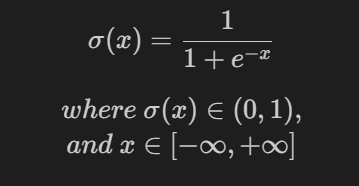

In [2]:
# python helper functions for plotting graphs -
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
plt.style.use('fivethirtyeight')

x = np.linspace(-10, 10, 100)

def plot_graph(x, y, 
               ALPHA=0.6, 
               label_x = r"$x \rightarrow$", label_y=r"$act(x) \rightarrow$", 
               title=None,
               LABEL=None):
    plt.figure(figsize=(7,5))
    plt.axhline(y=0, color="black", linestyle="--", lw=2)
    plt.axvline(x=0, color="black", linestyle="--", lw=2)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(title)

    if LABEL != None:
        plt.plot(x, y, alpha=ALPHA, label=LABEL);
        plt.legend(fontsize=14)

    else:
        plt.plot(x, y, alpha=ALPHA);
      
# def derivative(f, x, eps=0.000001):
#     return (f(x + eps) - f(x - eps))/(2 * eps)

def derivative(f, x, delta_x=1e-6):
    return (f(x + delta_x) - f(x))/(delta_x)

In [3]:
def sigmoid(x):
    return tf.keras.activations.sigmoid(x)

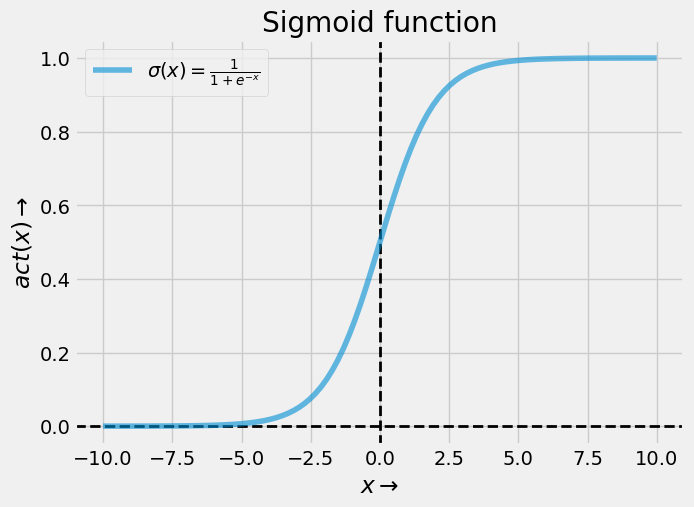

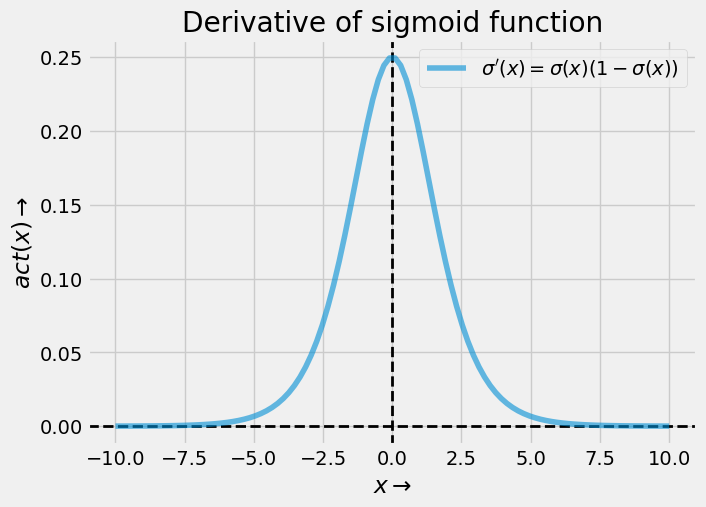

In [4]:
plot_graph(x, sigmoid(x), title="Sigmoid function", 
           LABEL=r"$\sigma(x) = \frac{1}{1 + e^{-x}}$")

plot_graph(x, derivative(sigmoid, x), title="Derivative of sigmoid function", 
           LABEL=r"$\sigma^\prime(x) = \sigma(x)(1-\sigma(x))$")

Here's how it works:

* Output Range: The sigmoid function squashes its input values to the range (0, 1). For any input x, the output σ(x) will always be between 0 and 1.

* Binary Classification: One of the primary use cases for the sigmoid function is in binary classification problems where the goal is to predict a binary outcome (0 or 1). The output of the sigmoid function can be interpreted as the probability of the input belonging to class 1.

* Smooth Transition: The sigmoid function provides a smooth, differentiable transition between its two extreme values. This smoothness is advantageous during gradient-based optimization algorithms, such as gradient descent, which rely on derivatives for updating the weights during training.

###### Advantages of Sigmoid Function : -
1. Smooth gradient, preventing “jumps” in output values.
2. Output values bound between 0 and 1, normalizing the output of each neuron.
3. Clear predictions, i.e very close to 1 or 0.


###### Sigmoid has three major disadvantages:
1. Prone to gradient vanishing
2. Function output is not zero-centered
3. Power operations are relatively time consuming

### Q5.What is the rectified linear unit (ReLU) activation function? How does it differ from the sigmoid function?

The Rectified Linear Unit (ReLU) is an activation function commonly used in neural networks, particularly in the hidden layers. The ReLU activation function is defined as:

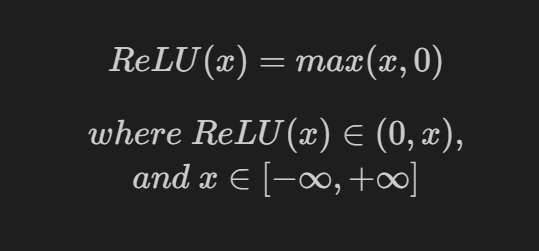

In [5]:
def relu(x):
    return tf.keras.activations.relu(x, alpha=0.0, max_value=None, threshold=0)

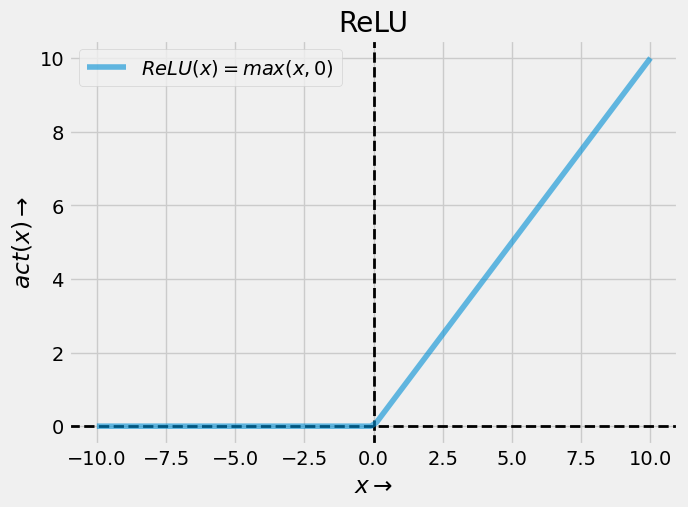

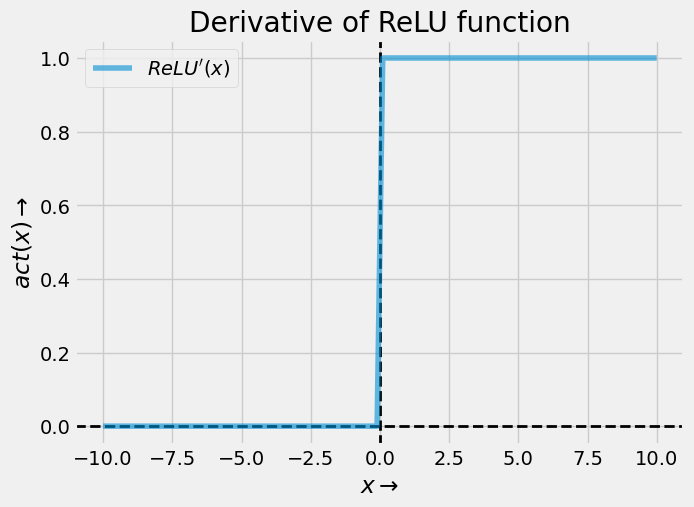

In [6]:
plot_graph(x, relu(x), title="ReLU",
           LABEL=r"$ReLU(x)= max(x,0)$");

plot_graph(x, derivative(relu, x), title="Derivative of ReLU function", 
           LABEL=r"$ReLU^\prime(x)$")

The ReLU function is actually a function that takes the maximum value. Note that this is not fully interval-derivable, but we can take sub-gradient, as shown in the figure above. Although ReLU is simple, it is an important achievement in recent years.

The ReLU (Rectified Linear Unit) function is an activation function that is currently more popular. Compared with the sigmod function and the tanh function, it has the following advantages:

1. When the input is positive, there is no gradient saturation problem.

2. The calculation speed is much faster. The ReLU function has only a linear relationship (before and after 0 i.e. conditionally linear or piece wise linear). Whether it is forward or backward, it is much faster than sigmod and tanh. (Sigmod and tanh need to calculate the exponent, which will be slower.)

Of course, there are disadvantages:

1. When the input is negative, ReLU is completely inactive, which means that once a negative number is entered, ReLU will die. In this way, in the forward propagation process, it is not a problem. Some areas are sensitive and some are insensitive. But in the backpropagation process, if you enter a negative number, the gradient will be completely zero, which has the same problem as the sigmod function and tanh function.

2. We find that the output of the ReLU function is either 0 or a positive number, which means that the ReLU function is not a 0-centric function.

### Q6. What are the benefits of using the ReLU activation function over the sigmoid function?

Using the Rectified Linear Unit (ReLU) activation function over the sigmoid function offers several benefits, especially in the context of training deep neural networks:

* ##### Mitigation of Vanishing Gradient Problem:
ReLU helps alleviate the vanishing gradient problem that can occur in deep networks with the sigmoid activation function. The constant gradient of 1 for positive inputs allows for more effective weight updates during backpropagation, leading to faster convergence during training.


* ##### Computational Efficiency:
ReLU is computationally more efficient compared to the sigmoid function. The ReLU activation involves a simple thresholding operation (max(0, x)), while the sigmoid function requires exponentiation and can be computationally more expensive.

* ##### Non-Saturation of Neurons:
Unlike sigmoid neurons that saturate (approach the extreme values of 0 or 1) for large positive or negative inputs, ReLU neurons do not saturate for positive inputs. This property helps prevent neurons from becoming unresponsive during training.

* ##### Sparsity and Sparse Activation:
ReLU introduces sparsity into the network by setting negative inputs to zero. This sparsity can be beneficial in certain scenarios, reducing the computational load and memory requirements.

* ##### Biologically Inspired:
The ReLU activation function is considered to be more biologically plausible than sigmoid. Biological neurons often exhibit behavior resembling a threshold response, and ReLU captures this behavior more closely.

* ##### Simpler Implementation:
The ReLU activation is a simple thresholding operation, making it straightforward to implement and understand. This simplicity contributes to ease of use and interpretability.

* ##### Facilitates Optimization:
The non-saturation property of ReLU and its ability to provide useful gradients for positive inputs contribute to a more favorable optimization landscape during training. This can lead to faster convergence and better generalization.


It's important to note that while ReLU has these advantages, it is not without its challenges. One common issue is the "dying ReLU" problem, where neurons can become inactive and always output zero. This typically happens when a large gradient flows through a ReLU neuron, causing the weights to update in such a way that the neuron always produces zero for all inputs. Variants like Leaky ReLU, Parametric ReLU, and Exponential Linear Unit (ELU) have been proposed to address this problem and further improve the performance of ReLU-based activations in specific scenarios.

### Q7. Explain the concept of "leaky ReLU" and how it addresses the vanishing gradient problem.

Leaky ReLU (Rectified Linear Unit) is a variant of the traditional ReLU activation function. While the standard ReLU sets all negative inputs to zero, Leaky ReLU allows a small, positive slope for negative inputs. The mathematical expression for Leaky ReLU is:

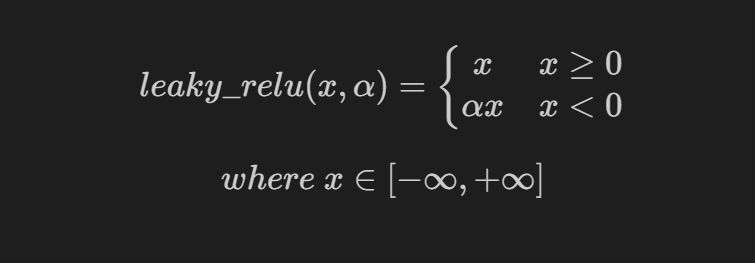

In [7]:
def leaky_relu(x, alpha=0.3):
    return np.where(x>=0, x, alpha*x)

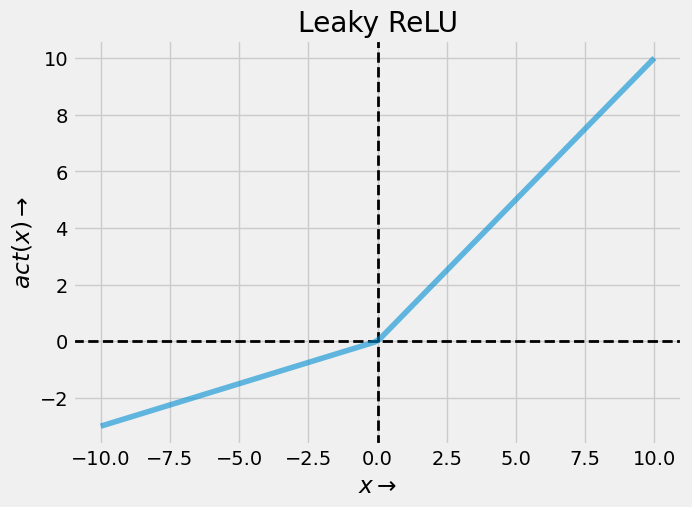

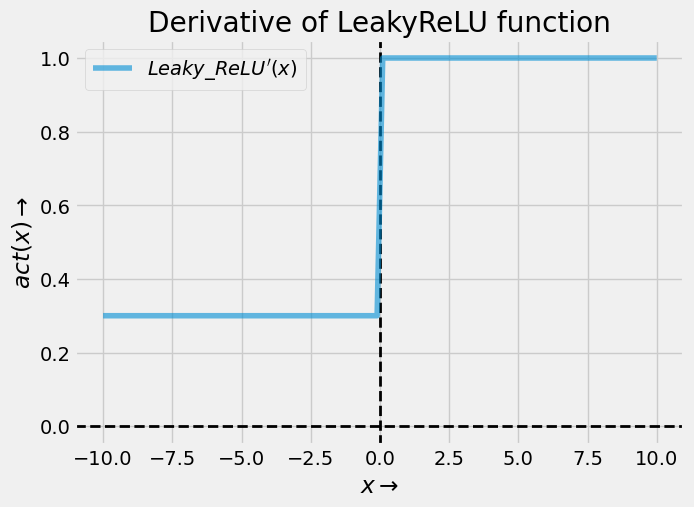

In [8]:
plot_graph(x, leaky_relu(x), title="Leaky ReLU");

plot_graph(x, derivative(leaky_relu, x), title="Derivative of LeakyReLU function", 
           LABEL=r"$Leaky\_ReLU^\prime(x)$")

In order to solve the Dead ReLU Problem, people proposed to set the first half of ReLU 0.01x instead of 0. Another intuitive idea is a parameter-based method, **$Parametric ReLU : f(x)= max(\alpha x,x)$**, WHERE $\alpha$ can be learned from back propagation. In theory, Leaky ReLU has all the advantages of ReLU, plus there will be no problems with Dead ReLU, but in actual operation, it has not been fully proved that Leaky ReLU is always better than ReLU.

* ##### Non-Zero Gradient for Negative Inputs:
   * In standard ReLU, the gradient is zero for negative inputs, which can lead to the vanishing gradient problem. Leaky ReLU        addresses this by providing a small, non-zero gradient for negative inputs (αx).
   * This small slope ensures that even neurons with negative inputs contribute a gradient to the weight updates during              backpropagation.
   
* ##### Prevents Neurons from Dying:
The introduction of a non-zero slope for negative inputs prevents neurons from becoming completely inactive. Even if a Leaky ReLU neuron has a negative output, it still allows a small amount of information to flow through, ensuring that the neuron can continue to learn.

* ##### Maintains Sparsity:
Like the standard ReLU, Leaky ReLU maintains sparsity by setting negative inputs to a non-zero value. This sparsity can be beneficial in certain scenarios.

### Q8. What is the purpose of the softmax activation function? When is it commonly used?

The softmax activation function is commonly used in machine learning, particularly in the output layer of a neural network, for tasks involving classification. Its primary purpose is to convert a vector of raw scores or logits into a probability distribution over multiple classes. The softmax function takes an input vector and normalizes it into a probability distribution that sums to 1.

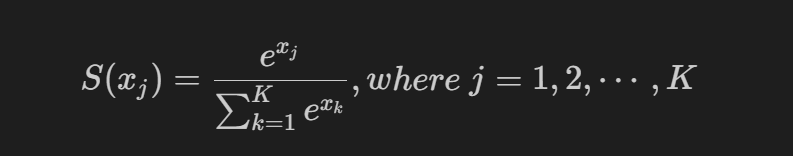

In [9]:
tf.keras.activations.softmax(tf.constant([[0.3,0.3,0.4,0.5,0.7]]), axis=-1)

<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[0.17186862, 0.17186862, 0.1899442 , 0.20992076, 0.2563978 ]],
      dtype=float32)>

In [10]:
import numpy as np
1 / (1 + np.exp(-10))

0.9999546021312976

Softmax is commonly used in the output layer of a neural network for multi-class classification problems. In this context, the raw scores or logits produced by the preceding layers are transformed into probabilities representing the likelihood of each class. The predicted class is often the one with the highest probability.

It's important to note that softmax is sensitive to the scale of the input values, and small differences in the input can lead to significant differences in the output probabilities. This sensitivity can be both an advantage and a disadvantage, and it's one reason why careful preprocessing of input data and consideration of model architecture are crucial in machine learning applications.

### Q9. What is the hyperbolic tangent (tanh) activation function? How does it compare to the sigmoid function?

The hyperbolic tangent (tanh) activation function is a mathematical function commonly used in artificial neural networks. It is similar to the sigmoid function but has a range between -1 and 1, making it zero-centered. The formula for the tanh function is given by:

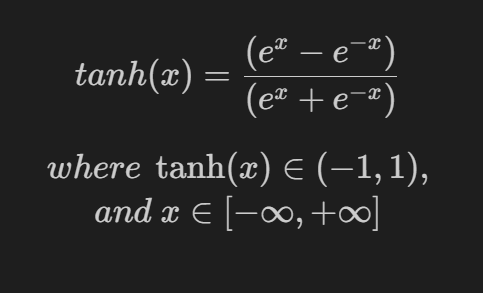

In [11]:
def tanh(x):
    return tf.keras.activations.tanh(x)

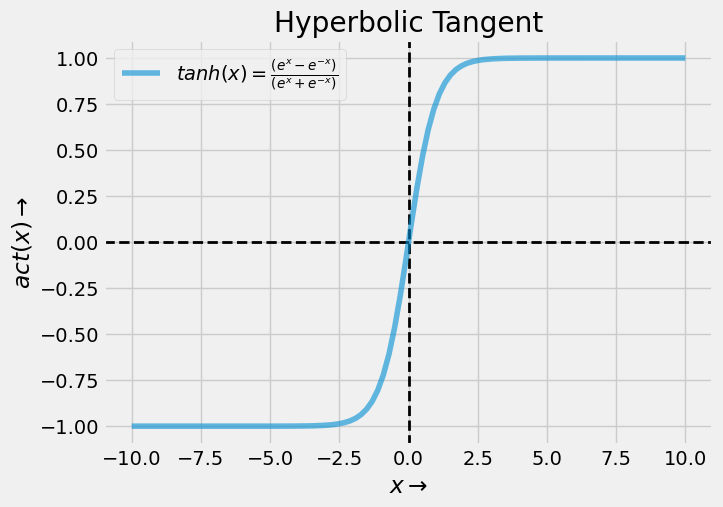

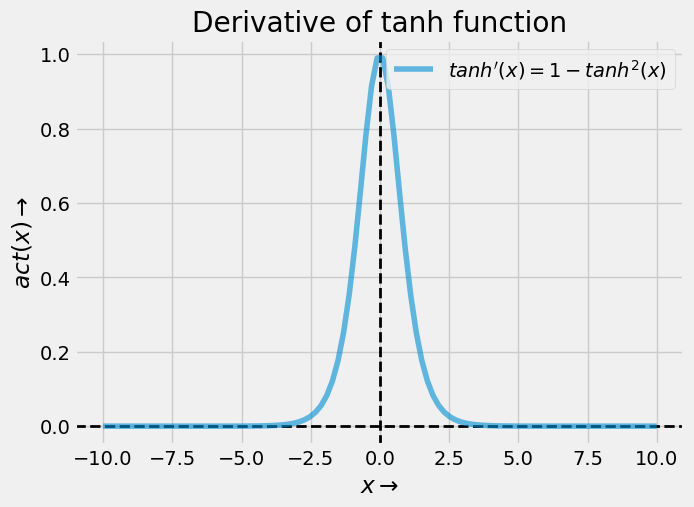

In [12]:
plot_graph(x, tanh(x), title="Hyperbolic Tangent",
           LABEL=r"$tanh(x) = \frac{(e^{x} - e^{-x})}{(e^{x} + e^{-x})}$");

plot_graph(x, derivative(tanh, x), title="Derivative of tanh function", 
           LABEL=r"$tanh^\prime(x) = 1 - tanh^2(x)$")

Tanh is a hyperbolic tangent function. The curves of tanh function and sigmod function are relatively similar. Let ’s compare them. First of all, when the input is large or small, the output is almost smooth and the gradient is small, which is not conducive to weight update. The difference is the output interval. 

The output interval of tanh is (-1, 1), and the whole function is 0-centric, which is better than sigmod.

In general binary classification problems, the tanh function is used for the hidden layer and the sigmod function is used for the output layer. However, these are not static, and the specific activation function to be used must be analyzed according to the specific problem, or it depends on debugging.

###### Comparison with the sigmoid function:

* Range: The sigmoid function has an output range between 0 and 1, while the tanh function has a range between -1 and 1. The tanh function is often preferred when the data or activations have negative values.

* Zero-Centered: The sigmoid function is not zero-centered, and its mean is around 0.5. The tanh function, being zero-centered, is sometimes preferred in situations where the network benefits from inputs with positive and negative values.

In practice, the choice between the sigmoid and tanh activation functions depends on the specific characteristics of the problem and the behavior desired in the neural network. Both functions are commonly used in different parts of neural networks, and experimentation is often necessary to determine which one works better for a particular task.